# Import necessary libraries for data processing

In [1]:
import pandas as pd
import numpy as np

# Importing Movies and Rating Files

In [2]:
movies = pd.read_csv("movie.csv")
rating = pd.read_csv("rating.csv", nrows=15_000_000)

# Data Preprocessing

In [3]:
movies.shape , rating.shape  ## Lets see the movies and rating sizes

((27278, 3), (15000000, 4))

In [4]:
rating.sample()  ##See what’s included in the ratings

,userId,movieId,rating,timestamp
12354370,85371,304,3.0,1999-09-28 09:41:13


In [5]:
movies.head(10)  ##See what’s included in the movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
all_movie_ids=movies['movieId'].tolist()

In [7]:
rating.drop(columns=['timestamp'],inplace=True) ## Drop the unnecessary column.

In [8]:
rating.head() 

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [9]:
rating['userId'].unique(),rating['movieId'].unique() # Lets see how many unique movies and users are included here.

(array([     1,      2,      3, ..., 103633, 103634, 103635]),
 array([     2,     29,     32, ..., 121489, 121491, 121493]))

In [10]:
rating['rating'] = pd.to_numeric(rating['rating'], downcast='float') # Try to decrease the memory size by converting float64 to float32.

In [11]:
final_dataset = rating.pivot(index="movieId" , columns="userId" , values="rating")
final_dataset ## Create a matrix that displays UserId against MovieId based on ratings.

C:\Users\sahad\AppData\Local\Temp\ipykernel_5616\1747119160.py:1: PerformanceWarning: The following operation may generate 2587973220 cells in the resulting pandas object.
  final_dataset = rating.pivot(index="movieId" , columns="userId" , values="rating")


userId,1,2,3,4,5,6,7,8,9,10,...,103626,103627,103628,103629,103630,103631,103632,103633,103634,103635
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,5.0,3.0,4.0,NaN,NaN,NaN,NaN,2.5,2.0
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,NaN,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
final_dataset.fillna(0, inplace=True) ## Replace NaN values with 0
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,103626,103627,103628,103629,103630,103631,103632,103633,103634,103635
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,2.5,2.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
no_user_voted = rating.groupby("movieId")['rating'].agg('count') ## How many users have rated each movi,
no_movies_voted = rating.groupby("userId")['rating'].agg('count') ## Calculates how many movies each user has rated,

In [14]:
no_movies_voted,no_user_voted

(userId
 1         175
 2          61
 3         187
 4          28
 5          66
          ... 
 103631     36
 103632     40
 103633     66
 103634    153
 103635    305
 Name: rating, Length: 103635, dtype: int64,
 movieId
 1         37195
 2         16624
 3          9543
 4          2047
 5          9132
           ...  
 131252        1
 131254        1
 131256        1
 131258        1
 131260        1
 Name: rating, Length: 24972, dtype: int64)

# Exploratory Data Analysis (EDA):

In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'No of users voted')

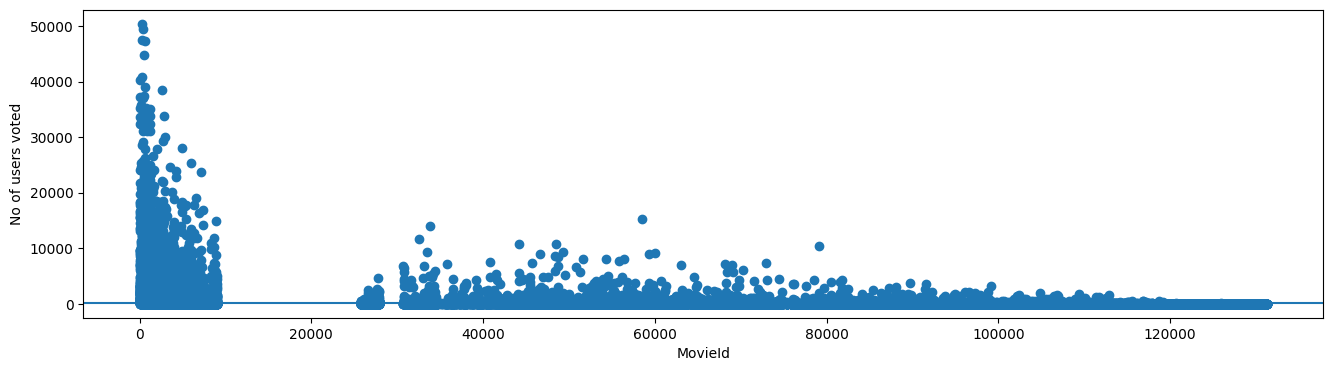

In [16]:
fig,axes = plt.subplots(1, 1, figsize=(16, 4))
plt.scatter(no_user_voted.index, no_user_voted)
plt.axhline(y=50)
plt.xlabel("MovieId")
plt.ylabel("No of users voted")

Text(0, 0.5, 'No. of users voted')

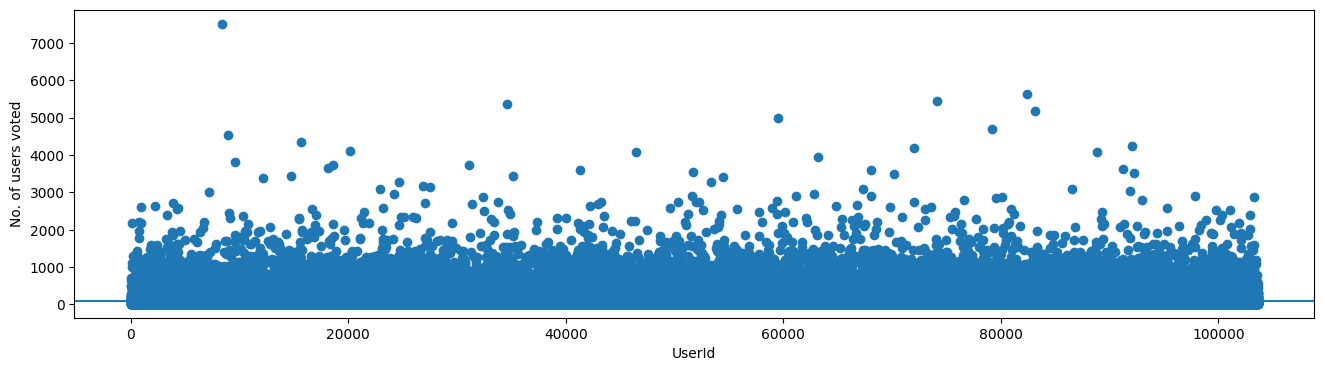

In [17]:
fig,axes = plt.subplots(1, 1, figsize=(16, 4))
plt.scatter(no_movies_voted.index, no_movies_voted)
plt.axhline(y=100)
plt.xlabel("UserId")
plt.ylabel("No. of users voted")

In [18]:
## Retain only those movies that have received more than 20 ratings and only those users who have rated more than 50 movies

final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 20].index, :] 
final_dataset = final_dataset.loc[: , no_movies_voted[no_movies_voted > 50].index]

In [19]:
final_dataset.shape

(12169, 63015)

In [20]:
movie_ids = final_dataset.index.tolist()
len(movie_ids)

12169

In [22]:
newids=[]
for ids in movie_ids:
    if ids in all_movie_ids:
        print(movies.iloc[ids+1]["title"])

Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)
GoldenEye (1995)
American President, The (1995)
Dracula: Dead and Loving It (1995)
Balto (1995)
Nixon (1995)
Cutthroat Island (1995)
Casino (1995)
Sense and Sensibility (1995)
Four Rooms (1995)
Ace Ventura: When Nature Calls (1995)
Money Train (1995)
Get Shorty (1995)
Copycat (1995)
Assassins (1995)
Powder (1995)
Leaving Las Vegas (1995)
Othello (1995)
Now and Then (1995)
Persuasion (1995)
City of Lost Children, The (Cité des enfants perdus, La) (1995)
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
Dangerous Minds (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Wings of Courage (1995)
Babe (1995)
Carrington (1995)
Dead Man Walking (1995)
Across the Sea of Time (1995)
It Takes Two (1995)
Clueless (1995)
Cry, the Beloved Country (1995)
Richard III (1995)
Dead Presidents (1995)
Restoration (1995)
Mortal Kombat (1995)
To Die For (1995

IndexError: single positional indexer is out-of-bounds

In [23]:
##  First convert the final_dataset into a sparse matrix 

from scipy.sparse import csr_matrix
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [24]:
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 13651535 stored elements and shape (12169, 63015)>
  Coords	Values
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 6)	4.5
  (0, 7)	4.0
  (0, 8)	4.5
  (0, 9)	3.0
  (0, 12)	3.0
  (0, 13)	4.0
  (0, 14)	4.0
  (0, 19)	3.0
  (0, 21)	5.0
  (0, 32)	4.0
  (0, 33)	4.0
  (0, 35)	5.0
  (0, 39)	4.0
  (0, 41)	4.0
  (0, 48)	5.0
  (0, 52)	3.5
  (0, 53)	4.0
  (0, 54)	5.0
  (0, 55)	3.5
  (0, 57)	4.0
  (0, 63)	4.0
  (0, 65)	3.5
  (0, 68)	3.0
  :	:
  (12167, 52160)	4.0
  (12167, 54463)	5.0
  (12167, 56828)	4.0
  (12167, 59180)	3.5
  (12168, 1795)	3.5
  (12168, 12874)	4.5
  (12168, 13726)	4.0
  (12168, 15943)	3.5
  (12168, 17445)	3.5
  (12168, 17696)	3.0
  (12168, 18989)	2.5
  (12168, 21813)	1.5
  (12168, 24750)	1.5
  (12168, 25406)	2.5
  (12168, 30023)	2.5
  (12168, 31233)	2.5
  (12168, 31459)	4.0
  (12168, 31740)	5.0
  (12168, 35290)	3.5
  (12168, 36317)	4.0
  (12168, 40585)	2.5
  (12168, 40901)	2.5
  (12168, 42246)	2.5
  (12168, 49509)	4.5
  (12168, 58396)	4

# Model Selection & Model Training

In [25]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1) ## n_neighbors=5,  algorithm='auto', n_jobs=None)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# Movie Recomendation

In [26]:
def get_recommendation(movie_name):
    movie_list = movies[movies['title'].str.contains(movie_name)]
    
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=10+1) ##  Get 10+1 neighbors

        # Exclude the first result (input movie itself) and sort by distance
        rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[1:]
        
        recommended_movies = []
        for val in rec_movies_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommended_movies.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})
        df = pd.DataFrame(recommended_movies, index=range(1, 11))
        return df
    else:
        return "Movie not found"

In [27]:
get_recommendation("Rock, The")

,Title,Distance
1,Mission: Impossible (1996),0.360546
2,Independence Day (a.k.a. ID4) (1996),0.375344
3,Speed (1994),0.418625
4,Terminator 2: Judgment Day (1991),0.431550
5,Jurassic Park (1993),0.432133
6,Twister (1996),0.432155
7,True Lies (1994),0.432650
8,"Fugitive, The (1993)",0.441195
9,Die Hard (1988),0.450648
10,Braveheart (1995),0.458919
